In [2]:
import pandas as pd
from pandas.io import gbq
import numpy as np

In [31]:
pd.options.display.float_format = '{:,.3f}'.format

In [3]:
data = gbq.read_gbq("SELECT * FROM `umg-comm-tech-dev.fixed_playlists_data.data_iteration1`", 
                    project_id='umg-comm-tech-dev', dialect = "standard")

In [4]:
data.head()

,isrc,artist_name,track_name,label_apple,major_label_apple,label_spotify,original_release_date,ms_length,parent_genre_apple,genre_apple,genres_spotify,monthly_users,monthly_streams,lean_back_perc,popularity_apple,popularity_spotify,artist_popularity_spotify,artist_followers_spotify
0,MXF061100006,Zoé,Labios Rotos,Capitol Latin,UMG,Capitol Latin,2012-11-19,243095,Latin,Alternative & Rock in Spanish,"latin alternative,latin rock,mexican rock,rock...",4272540800,5026060600,29.253388,990.0,69.0,74.0,2131619.0
1,US4D21400084,Farruko,No Soy,Venemusic,UMG,Universal Music Group,2014-10-27,208346,Latin,Latin Urban,"latin,latin hip hop,reggaeton,trap latino,trop...",576,576,83.333333,848.0,0.0,84.0,4460089.0
2,MXUM71300331,Zoé,Game Over Shanghai (Liu Yang River),EMI Mexico,UMG,Universal Music Group,2013-01-01,305327,Latin,Alternative & Rock in Spanish,"latin alternative,latin rock,mexican rock,rock...",668244,780780,11.528472,NaN,45.0,74.0,2131619.0
3,USBN20600493,Norah Jones,Sinkin' Soon,Blue Note Records,UMG,Blue Note Records,2007-03-26,278307,None,None,"adult standards,folk-pop,neo mellow,vocal jazz",231313856,266478912,77.268127,949.0,52.0,74.0,1626319.0
4,GBGLM0800076,Cage The Elephant,Cover Me Again,Relentless/Virgin,UMG,Relentless/Virgin,2009-02-01,190707,Alternative,Indie Rock,"garage rock,indie pop,indie rock,modern altern...",885,942,7.006369,572.0,7.0,74.0,1255637.0


In [24]:
data.original_release_date[0]<pd.Timestamp('2016-01-01')

True

In [18]:
data.describe(include='all')

,isrc,artist_name,track_name,label_apple,major_label_apple,label_spotify,original_release_date,ms_length,parent_genre_apple,genre_apple,genres_spotify,monthly_users,monthly_streams,lean_back_perc,popularity_apple,popularity_spotify,artist_popularity_spotify,artist_followers_spotify
count,1418657,1418657,1418657,1418653,1418657,1418655,1418657,"1,418,657.0",1411721,1411972,1374324,"1,418,657.0","1,418,657.0","1,418,657.0","148,345.0","1,374,442.0","1,374,324.0","1,374,323.0"
unique,1418657,103092,929251,3754,1,3945,11691,nan,47,248,11010,nan,nan,nan,nan,nan,nan,nan
top,JPTO09506810,Party Tyme Karaoke,Intro,Decca Music Group Ltd.,UMG,Decca Music Group Ltd.,2013-01-01 00:00:00,nan,Pop,Pop,,nan,nan,nan,nan,nan,nan,nan
freq,1,9015,1162,44916,1418657,66158,40017,nan,305324,289281,309647,nan,nan,nan,nan,nan,nan,nan
first,NaN,NaN,NaN,NaN,NaN,NaN,1885-01-01 00:00:00,nan,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan
last,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-19 00:00:00,nan,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"235,443.6",NaN,NaN,NaN,"1,960,299,466.4","2,281,682,276.6",18.9,670.9,9.9,40.1,"289,108.3"
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"135,142.1",NaN,NaN,NaN,"232,439,058,268.9","270,229,336,173.0",19.6,280.7,12.5,21.4,"1,182,423.3"
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2,000.0",NaN,NaN,NaN,1.0,1.0,0.0,1.0,0.0,0.0,0.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"170,000.0",NaN,NaN,NaN,128.0,144.0,5.4,468.0,1.0,24.0,"1,358.0"


In [25]:
data['catalogue_track'] = [1 if x < pd.Timestamp('2017-01-01') else 0 for x in data.original_release_date]

In [28]:
by_artist = data.groupby(by=['artist_name'])

In [34]:
catalogue_proportion = by_artist.catalogue_track.sum()/by_artist.catalogue_track.count()

In [36]:
artist_catalogue_proportion = pd.DataFrame(catalogue_proportion).reset_index()

In [39]:
data[data.popularity_apple==1001]

,isrc,artist_name,track_name,label_apple,major_label_apple,label_spotify,original_release_date,ms_length,parent_genre_apple,genre_apple,genres_spotify,monthly_users,monthly_streams,lean_back_perc,popularity_apple,popularity_spotify,artist_popularity_spotify,artist_followers_spotify,catalogue_track
117,MXF061100536,Zoé,Bésame Mucho,EMI México,UMG,EMI México,2011-12-13,337546,Latin,Alternative & Rock in Spanish,"latin alternative,latin rock,mexican rock,rock...",126652784,142739552,45.743,"1,001.000",59.000,74.000,"2,131,619.000",1
306,US2BU1300784,Daddy Yankee,Suena Boom,EL CARTEL RECORDS (EC3),UMG,El Cartel Records (EC3),2013-01-01,189080,Latin,Latin Urban,"latin,latin hip hop,pop,reggaeton,tropical",4155920,4845600,4.420,"1,001.000",41.000,88.000,"8,939,825.000",1
330,MXUM71400911,J Balvin,6 AM (feat. Farruko),Universal Music Mexico,UMG,Universal Music Group,2014-09-09,187586,Latin,Latin Urban,"latin,reggaeton",649908,749644,19.665,"1,001.000",39.000,94.000,"10,730,137.000",1
788,USCA28700437,Frank Sinatra,Isle Of Capri,CAPITOL CATALOG MKT (C92),UMG,CAPITOL CATALOG MKT (C92),1958-01-19,147577,Easy Listening,Easy Listening,"adult standards,christmas,easy listening,lounge",42576,45840,7.539,"1,001.000",16.000,77.000,"2,422,144.000",1
911,MXUM71300433,J Balvin,La Venganza,EMI Mexico,UMG,Universal Music Group,2014-09-09,206507,Latin,Latin Urban,"latin,reggaeton",116792496,132074304,20.351,"1,001.000",51.000,94.000,"10,730,137.000",1
994,GBAAA0800083,The Kooks,All Over Town,Virgin Records,UMG,Virgin Records,2008-04-11,198147,None,None,"garage rock,indie rock,modern rock,rock",54668928,61966752,6.561,"1,001.000",37.000,74.000,"1,514,928.000",1
1073,BR3PJ1200023,Jorge & Mateus,Voa Beija-Flor,Universal Music International Ltda.,UMG,Universal Music International Ltda.,2012-01-01,427333,Brazilian,Sertanejo,"sertanejo,sertanejo universitario",1004128,1096992,77.164,"1,001.000",52.000,82.000,"7,864,188.000",1
1222,USRH10800748,Frank Sinatra,I'm Beginning To See The Light,FRANK SINATRA DIGITAL REPRISE,UMG,FRANK SINATRA DIGITAL REPRISE,1962-01-01,154906,None,None,"adult standards,christmas,easy listening,lounge",157608,180504,8.337,"1,001.000",22.000,77.000,"2,422,144.000",1
1235,USUM71025737,Don Omar,Huerfano De Amor,Machete - VI Music,UMG,Machete - VI Music,2010-11-16,292120,Latin,Latin Urban,"latin,latin hip hop,pop,reggaeton,tropical",76245120,86371200,53.517,"1,001.000",44.000,79.000,"3,130,677.000",1
1265,USUM71810803,Tori Kelly,Psalm 42,Schoolboy Records & Capitol Records,UMG,Schoolboy Records & Capitol Records,2018-09-14,334497,Christian & Gospel,Gospel,"dance pop,pop,post-teen pop,r&b,viral pop",13082355,16484625,29.166,"1,001.000",65.000,74.000,"1,451,735.000",0


In [41]:
artists_sum_streams = by_artist.monthly_streams.sum()

In [42]:
artists_sum_streams = pd.DataFrame(artists_sum_streams).reset_index()

In [43]:
artists_sum_streams.head()

,artist_name,monthly_streams
0,!Boom!,672
1,"""Billy Elliott"" London Cast",88815272
2,"""Blues Men"" Orchester",18
3,"""Calendar Girls"" Original London Cast",1722168
4,"""Chris Glover""",222


In [45]:
artists_summary = pd.merge(artist_catalogue_proportion,artists_sum_streams, on=['artist_name'])

In [47]:
artists_summary = artists_summary.sort_values(by=['catalogue_track', 'monthly_streams'], ascending=[False,False])

In [50]:
spotify_artist_track_sql = "SELECT * FROM `umg-comm-tech-dev.hundred_artist.artists_track_data`"

spotify_artists_tracks = gbq.read_gbq(spotify_artist_track_sql, project_id='umg-comm-tech-dev', dialect='standard')

In [51]:
apple_artist_track_sql = "SELECT * FROM `umg-comm-tech-dev.hundred_artist.artists_track_data_apple`"

apple_artists_tracks = gbq.read_gbq(apple_artist_track_sql, project_id='umg-comm-tech-dev', dialect='standard')

In [54]:
spotify_artists_tracks.head()

,partner_artist_uri,artist_name,track_isrc,partner_track_id,partner_track_uri,track_name
0,spotify:artist:6FBDaR13swtiWwGhX1WQsP,blink-182,USMC10346094,81be9a47d4ef412da2dbaef35b062edf,spotify:track:3WP7bhQkFRVsdXWbTPwkiz,Feeling This
1,spotify:artist:6FBDaR13swtiWwGhX1WQsP,blink-182,USMC19959125,fdf74a121f9e4202b77dcc4841715297,spotify:track:7Je4m7EgRI34dKCvgUOdzV,Mutt
2,spotify:artist:6FBDaR13swtiWwGhX1WQsP,blink-182,USUM70504671,a718e40e90a845e78c2ca1af893a8507,spotify:track:55j5OoCA0CUOQ2KsoL7UTt,Josie
3,spotify:artist:6FBDaR13swtiWwGhX1WQsP,blink-182,USMC10346123,d5eea5d3f1d54dffa8e8b3326c053c09,spotify:track:6vGqxa1zm8osVl6FZ8ghpn,I Miss You
4,spotify:artist:6FBDaR13swtiWwGhX1WQsP,blink-182,USMC19959125,56af529975894ccc82d30901cd2f145f,spotify:track:2DzsGZExWbIDdfOwc3CIxN,Mutt


In [56]:
spotify_artists_tracks.describe()

,partner_artist_uri,artist_name,track_isrc,partner_track_id,partner_track_uri,track_name
count,94571,94571,94571,94571,94571,94571
unique,80,80,25609,94571,94571,24726
top,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,USMC17446153,f972dc5208d14bd8afdbc64c3d50e0d9,spotify:track:1F6tJQxkLDojD21hKrEzwJ,I Heard It Through The Grapevine
freq,4278,4278,142,1,1,166


In [55]:
apple_artists_tracks.head()

,artist_id,artist_name,isrc,apple_track_id,title
0,137938148,陳奕迅,HKUM71000512,396945264,葡萄成熟時(Live)
1,137938148,陳奕迅,HKJ631305010,803865376,"碌卡(Live In Hong Kong, 2013)"
2,137938148,陳奕迅,HKG070610046,150409839,Overture(Live)
3,137938148,陳奕迅,HKUM70703305,281605628,Crying In the Party
4,137938148,陳奕迅,HKUM70704602,271630715,Crying In the Party(2007 Live)


In [57]:
apple_artists_tracks.describe()

,artist_id,artist_name,isrc,apple_track_id,title
count,92890,92890,92890,92890,92890
unique,81,81,27689,92772,29466
top,1249595,The Rolling Stones,USMC17446153,1442022119,Sweet Home Alabama
freq,5282,5282,101,2,106


In [60]:
inner_join_artists_tracks = pd.merge(apple_artists_tracks,spotify_artists_tracks, left_on='isrc',
                                     right_on = 'track_isrc', how='inner')
inner_join_artists_tracks.head()

,artist_id,artist_name_x,isrc,apple_track_id,title,partner_artist_uri,artist_name_y,track_isrc,partner_track_id,partner_track_uri,track_name
0,137938148,陳奕迅,HKUM71000512,396945264,葡萄成熟時(Live),spotify:artist:2QcZxAgcs2I1q7CtCkl6MI,Eason Chan,HKUM71000512,b0a71d1b2eee4d898a9cd3fe3cadbf6a,spotify:track:5nl1hEG6VLMIQKnOEqA9Em,葡萄成熟時 - Live
1,137938148,陳奕迅,HKJ631305010,803865376,"碌卡(Live In Hong Kong, 2013)",spotify:artist:2QcZxAgcs2I1q7CtCkl6MI,Eason Chan,HKJ631305010,2e80c48702da401ebc301261f39ff9c5,spotify:track:1pKuD54OipImLDJj8thYGx,碌卡 - Live In Hong Kong / 2013
2,137938148,陳奕迅,HKJ631305010,791692595,"Favour(Live In Hong Kong, 2013)",spotify:artist:2QcZxAgcs2I1q7CtCkl6MI,Eason Chan,HKJ631305010,2e80c48702da401ebc301261f39ff9c5,spotify:track:1pKuD54OipImLDJj8thYGx,碌卡 - Live In Hong Kong / 2013
3,137938148,陳奕迅,HKG070610046,150409839,Overture(Live),spotify:artist:2QcZxAgcs2I1q7CtCkl6MI,Eason Chan,HKG070610046,44d251be4d8c415183919328c70b8ca3,spotify:track:25RAQYW5C29DNp5tKcAKOL,OVERTURE - Live
4,137938148,陳奕迅,HKUM70703305,281605628,Crying In the Party,spotify:artist:2QcZxAgcs2I1q7CtCkl6MI,Eason Chan,HKUM70703305,2eccf1a8dc2040afb99f149207e5dd5e,spotify:track:1qjj0XZkew8q28alRkSjka,Crying in the Party


In [61]:
inner_join_artists_tracks.describe()

,artist_id,artist_name_x,isrc,apple_track_id,title,partner_artist_uri,artist_name_y,track_isrc,partner_track_id,partner_track_uri,track_name
count,787986,787986,787986,787986,787986,787986,787986,787986,787986,787986,787986
unique,80,81,23717,85601,27115,80,80,23717,91776,91776,23452
top,127329,Marvin Gaye,USMC17446153,1442022115,Sweet Home Alabama,spotify:artist:3koiLjNrgRTNbOwViDipeA,Marvin Gaye,USMC17446153,8f339f655711430c9c018a931845b58b,spotify:track:49rnUM7rWULBX4akYI3jQx,Sweet Home Alabama
freq,69618,69618,14342,182,14235,69618,69618,14342,101,101,14362


In [62]:
inner_join_artists_tracks.columns

Index(['artist_id', 'artist_name_x', 'isrc', 'apple_track_id', 'title',
       'partner_artist_uri', 'artist_name_y', 'track_isrc', 'partner_track_id',
       'partner_track_uri', 'track_name'],
      dtype='object')

In [69]:
join_cols = ['artist_id', 'partner_artist_uri', 'artist_name_x','artist_name_y', 'apple_track_id',
            'partner_track_id', 'partner_track_uri', 'isrc', 'title','track_name']

In [70]:
df = inner_join_artists_tracks[join_cols]

In [71]:
df.head()

,artist_id,partner_artist_uri,artist_name_x,artist_name_y,apple_track_id,partner_track_id,partner_track_uri,isrc,title,track_name
0,137938148,spotify:artist:2QcZxAgcs2I1q7CtCkl6MI,陳奕迅,Eason Chan,396945264,b0a71d1b2eee4d898a9cd3fe3cadbf6a,spotify:track:5nl1hEG6VLMIQKnOEqA9Em,HKUM71000512,葡萄成熟時(Live),葡萄成熟時 - Live
1,137938148,spotify:artist:2QcZxAgcs2I1q7CtCkl6MI,陳奕迅,Eason Chan,803865376,2e80c48702da401ebc301261f39ff9c5,spotify:track:1pKuD54OipImLDJj8thYGx,HKJ631305010,"碌卡(Live In Hong Kong, 2013)",碌卡 - Live In Hong Kong / 2013
2,137938148,spotify:artist:2QcZxAgcs2I1q7CtCkl6MI,陳奕迅,Eason Chan,791692595,2e80c48702da401ebc301261f39ff9c5,spotify:track:1pKuD54OipImLDJj8thYGx,HKJ631305010,"Favour(Live In Hong Kong, 2013)",碌卡 - Live In Hong Kong / 2013
3,137938148,spotify:artist:2QcZxAgcs2I1q7CtCkl6MI,陳奕迅,Eason Chan,150409839,44d251be4d8c415183919328c70b8ca3,spotify:track:25RAQYW5C29DNp5tKcAKOL,HKG070610046,Overture(Live),OVERTURE - Live
4,137938148,spotify:artist:2QcZxAgcs2I1q7CtCkl6MI,陳奕迅,Eason Chan,281605628,2eccf1a8dc2040afb99f149207e5dd5e,spotify:track:1qjj0XZkew8q28alRkSjka,HKUM70703305,Crying In the Party,Crying in the Party


In [72]:
rename_dict = {
    'artist_id':'artist_id_apple',
    'partner_artist_uri':'artist_id_spotify',
    'artist_name_x':'artist_name_apple',
    'artist_name_y':'artist_name_spotify',
    'apple_track_id':'track_id_apple',
    'partner_track_id':'track_id_spotify',
    'partner_track_uri':'track_uri_spotify',
    'track_name':'track_name_spotify',
    'title':'track_name_apple'
    }

df = df.rename(columns=rename_dict)
df.head()

,artist_id_apple,artist_id_spotify,artist_name_apple,artist_name_spotify,track_id_apple,track_id_spotify,track_uri_spotify,isrc,track_name_apple,track_name_spotify
0,137938148,spotify:artist:2QcZxAgcs2I1q7CtCkl6MI,陳奕迅,Eason Chan,396945264,b0a71d1b2eee4d898a9cd3fe3cadbf6a,spotify:track:5nl1hEG6VLMIQKnOEqA9Em,HKUM71000512,葡萄成熟時(Live),葡萄成熟時 - Live
1,137938148,spotify:artist:2QcZxAgcs2I1q7CtCkl6MI,陳奕迅,Eason Chan,803865376,2e80c48702da401ebc301261f39ff9c5,spotify:track:1pKuD54OipImLDJj8thYGx,HKJ631305010,"碌卡(Live In Hong Kong, 2013)",碌卡 - Live In Hong Kong / 2013
2,137938148,spotify:artist:2QcZxAgcs2I1q7CtCkl6MI,陳奕迅,Eason Chan,791692595,2e80c48702da401ebc301261f39ff9c5,spotify:track:1pKuD54OipImLDJj8thYGx,HKJ631305010,"Favour(Live In Hong Kong, 2013)",碌卡 - Live In Hong Kong / 2013
3,137938148,spotify:artist:2QcZxAgcs2I1q7CtCkl6MI,陳奕迅,Eason Chan,150409839,44d251be4d8c415183919328c70b8ca3,spotify:track:25RAQYW5C29DNp5tKcAKOL,HKG070610046,Overture(Live),OVERTURE - Live
4,137938148,spotify:artist:2QcZxAgcs2I1q7CtCkl6MI,陳奕迅,Eason Chan,281605628,2eccf1a8dc2040afb99f149207e5dd5e,spotify:track:1qjj0XZkew8q28alRkSjka,HKUM70703305,Crying In the Party,Crying in the Party


In [74]:
df.to_gbq(destination_table='hundred_artist.joined_artists_track_data', project_id='umg-comm-tech-dev', 
          if_exists='replace')

1it [00:06,  6.90s/it]


In [78]:
moments_apple_sql = """
SELECT
  *
FROM
  `umg-data-science.moments.apple_music`
WHERE
  isrc IN (
  SELECT
    isrc
  FROM
    `umg-comm-tech-dev.hundred_artist.joined_artists_track_data`
  GROUP BY
    isrc)
"""

In [80]:
moments_spotify_sql = """
SELECT
  *
FROM
  `umg-data-science.moments.spotify`
WHERE
  isrc IN (
  SELECT
    isrc
  FROM
    `umg-comm-tech-dev.hundred_artist.joined_artists_track_data`
  GROUP BY
    isrc)
"""

In [81]:
moments_apple = gbq.read_gbq(moments_apple_sql,
                          project_id = 'umg-comm-tech-dev', dialect='standard')

In [82]:
moments_spotify = gbq.read_gbq(moments_spotify_sql,
                          project_id = 'umg-comm-tech-dev', dialect='standard')

In [83]:
moments_apple.head()

,report_date,isrc,territory,streams_15_week,streams_1_week,score_1_day,score_7_day,score_28_day
0,2018-03-12,USUM71712944,AE,57712,2837,-0.907,0.036,0.411
1,2018-03-12,QM5FT1600103,AE,27986,1829,0.167,-0.001,-0.108
2,2018-03-12,USUM71516761,AE,37964,2346,-1.186,-0.338,-0.033
3,2018-03-12,SE5R71700107,AE,23141,1080,1.472,0.550,0.055
4,2018-03-12,USUM71516760,AE,33829,2114,0.354,-0.022,-0.256


In [85]:
moments_apple.describe(include='all')

,report_date,isrc,territory,streams_15_week,streams_1_week,score_1_day,score_7_day,score_28_day
count,8753753,8753753,8753753,"8,753,753.000","8,753,753.000","8,753,753.000","8,753,753.000","8,753,753.000"
unique,443,8060,68,nan,nan,nan,nan,nan
top,2018-12-24 00:00:00,USUM71712944,US,nan,nan,nan,nan,nan
freq,21890,18571,2923033,nan,nan,nan,nan,nan
first,2018-01-01 00:00:00,NaN,NaN,nan,nan,nan,nan,nan
last,2019-03-19 00:00:00,NaN,NaN,nan,nan,nan,nan,nan
mean,NaN,NaN,NaN,"190,858.247","13,144.505",0.026,0.033,"1,033,279,746.740"
std,NaN,NaN,NaN,"729,630.932","77,269.072",1.990,1.427,"2,389,543,067,659.387"
min,NaN,NaN,NaN,0.000,7.000,-599.738,-730.522,"-2,202.617"
25%,NaN,NaN,NaN,"29,853.000","1,964.000",-0.589,-0.207,-0.092


In [86]:
moments_spotify.head()

,report_date,isrc,territory,streams_15_week,streams_1_week,score_1_day,score_7_day,score_28_day
0,2018-05-13,USUM71214737,AR,62757,4949,-1.708,0.326,-0.097
1,2018-05-13,GBAYE0601692,AR,57640,3966,-1.758,0.648,0.001
2,2018-05-13,USIR29600117,AR,65314,4331,-1.899,0.875,0.118
3,2018-05-13,SEAYD7501010,AR,67968,5405,0.279,0.143,0.083
4,2018-05-13,USIR27800261,AR,87610,4554,-3.049,0.727,0.016


In [87]:
moments_spotify.describe(include='all')

,report_date,isrc,territory,streams_15_week,streams_1_week,score_1_day,score_7_day,score_28_day
count,13009086,13009086,13009086,"13,009,086.000","13,009,086.000","13,009,086.000","13,009,086.000","13,009,086.000"
unique,453,7066,63,nan,nan,nan,nan,nan
top,2019-02-19 00:00:00,GBUM71029604,US,nan,nan,nan,nan,nan
freq,30762,22215,2501849,nan,nan,nan,nan,nan
first,2018-01-01 00:00:00,NaN,NaN,nan,nan,nan,nan,nan
last,2019-03-29 00:00:00,NaN,NaN,nan,nan,nan,nan,nan
mean,NaN,NaN,NaN,"265,143.441","17,653.314",0.023,0.028,0.029
std,NaN,NaN,NaN,"717,229.917","56,070.709",1.671,1.358,4.594
min,NaN,NaN,NaN,"40,000.000",0.000,"-2,863.969","-1,863.773","-2,074.537"
25%,NaN,NaN,NaN,"58,834.000","3,802.000",-0.535,-0.196,-0.099


In [89]:
moments_joined = pd.merge(moments_apple, moments_spotify, on=['report_date','isrc','territory'], how = 'left', 
                          suffixes=['_apple','_spotify'])
moments_joined.head()

,report_date,isrc,territory,streams_15_week_apple,streams_1_week_apple,score_1_day_apple,score_7_day_apple,score_28_day_apple,streams_15_week_spotify,streams_1_week_spotify,score_1_day_spotify,score_7_day_spotify,score_28_day_spotify
0,2018-03-12,USUM71712944,AE,57712,2837,-0.907,0.036,0.411,nan,nan,nan,nan,nan
1,2018-03-12,QM5FT1600103,AE,27986,1829,0.167,-0.001,-0.108,nan,nan,nan,nan,nan
2,2018-03-12,USUM71516761,AE,37964,2346,-1.186,-0.338,-0.033,nan,nan,nan,nan,nan
3,2018-03-12,SE5R71700107,AE,23141,1080,1.472,0.550,0.055,nan,nan,nan,nan,nan
4,2018-03-12,USUM71516760,AE,33829,2114,0.354,-0.022,-0.256,nan,nan,nan,nan,nan


In [90]:
moments_joined.describe(include='all')

,report_date,isrc,territory,streams_15_week_apple,streams_1_week_apple,score_1_day_apple,score_7_day_apple,score_28_day_apple,streams_15_week_spotify,streams_1_week_spotify,score_1_day_spotify,score_7_day_spotify,score_28_day_spotify
count,8753753,8753753,8753753,"8,753,753.000","8,753,753.000","8,753,753.000","8,753,753.000","8,753,753.000","5,989,089.000","5,989,089.000","5,989,089.000","5,989,089.000","5,989,089.000"
unique,443,8060,68,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,2018-12-24 00:00:00,USUM71712944,US,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,21890,18571,2923033,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
first,2018-01-01 00:00:00,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
last,2019-03-19 00:00:00,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,NaN,NaN,NaN,"190,858.247","13,144.505",0.026,0.033,"1,033,279,746.740","444,060.972","29,466.375",0.024,0.031,0.038
std,NaN,NaN,NaN,"729,630.932","77,269.072",1.990,1.427,"2,389,543,067,659.387","1,008,515.247","79,717.511",2.055,1.755,6.397
min,NaN,NaN,NaN,0.000,7.000,-599.738,-730.522,"-2,202.617","40,000.000",0.000,"-2,863.969","-1,863.773","-1,380.495"
25%,NaN,NaN,NaN,"29,853.000","1,964.000",-0.589,-0.207,-0.092,"85,598.000","5,469.000",-0.522,-0.191,-0.097


In [115]:
moments_spot_only = moments_joined[(moments_joined.score_1_day_apple<5)&(moments_joined.score_7_day_apple<2)&(moments_joined.score_1_day_spotify>5)&(moments_joined.score_7_day_spotify>2)]

In [111]:
moments_either = moments_joined[(moments_joined.score_1_day_apple>=5)&(moments_joined.score_7_day_apple>=2)|(moments_joined.score_1_day_spotify>5)&(moments_joined.score_7_day_spotify>2)]

In [103]:
moment_mismatches = moments_joined[(moments_joined.score_1_day_apple>=5)&(moments_joined.score_7_day_apple>=2)&(moments_joined.score_1_day_spotify<5)&(moments_joined.score_7_day_spotify<2)]

&(moments_joined.streams_1_week_apple>moments_joined.streams_1_week_spotify)]

In [96]:
moment_mismatches.sort_values(by=['score_1_day_apple','score_7_day_apple','score_1_day_spotify','score_7_day_spotify'],
                             ascending = [False,False,True,True])

,report_date,isrc,territory,streams_15_week_apple,streams_1_week_apple,score_1_day_apple,score_7_day_apple,score_28_day_apple,streams_15_week_spotify,streams_1_week_spotify,score_1_day_spotify,score_7_day_spotify,score_28_day_spotify
7080116,2018-10-18,USUM71809296,CA,76276,31524,341.165,48.738,0.000,"51,026.000","17,204.000",2.442,0.349,0.000
142011,2018-03-22,USUM71802625,US,342237,142419,191.991,27.427,0.000,"55,556.000","24,163.000",0.004,0.001,0.000
8574051,2018-10-17,USUM71809292,CA,73908,27871,86.205,12.315,0.000,"51,069.000","19,672.000",0.000,0.000,0.000
3740223,2018-06-28,USUM71808193,CA,168186,75091,55.702,7.957,0.000,"149,702.000","61,306.000",-4.884,-0.698,0.000
3339510,2018-05-21,GBAYE0900599,US,515216,59546,35.791,4.859,1.162,"754,529.000","45,085.000",0.484,-0.011,0.036
634687,2018-12-17,USUM71816922,CA,65470,33410,29.242,4.177,0.000,"48,433.000","23,556.000",2.460,0.351,0.000
6080766,2018-05-11,USUM71806073,US,490731,123733,26.479,3.783,0.000,"105,897.000","16,467.000",-0.008,-0.001,0.000
926896,2019-02-22,USUM71813355,US,172207,16474,22.009,3.473,0.904,"118,399.000","5,519.000",-0.083,-0.286,0.044
931222,2019-02-22,USUM71813350,US,84218,8179,21.865,3.008,0.932,"44,934.000","1,847.000",-0.782,-0.263,0.086
930839,2019-02-22,USUM71813353,US,184275,16869,21.534,3.091,0.746,"94,204.000","4,259.000",-0.680,-0.206,0.057


In [98]:
release_dates = pd.read_csv('/Users/daria/Downloads/release_dates_for_moments.csv')
release_dates.head()

,isrc,original_release_date
0,SEAYD7415010,2005-09-05
1,USUM71207096,2012-01-01
2,GBUM71029637,2005-01-26
3,USUM71709176,2018-03-02
4,USUM71020517,2016-07-06


In [122]:
moment_mismatches = pd.merge(moment_mismatches,release_dates, how='left', on='isrc')

In [123]:
moment_mismatches

,report_date,isrc,territory,streams_15_week_apple,streams_1_week_apple,score_1_day_apple,score_7_day_apple,score_28_day_apple,streams_15_week_spotify,streams_1_week_spotify,score_1_day_spotify,score_7_day_spotify,score_28_day_spotify,original_release_date
0,2018-04-06,USUM71802559,US,198036,34932,6.541,5.747,0.000,"316,539.000","66,725.000",2.026,-2.184,0.000,NaN
1,2018-02-10,USIR10500072,AU,242481,20326,5.040,2.593,0.821,"890,097.000","67,104.000",1.856,1.858,0.531,NaN
2,2018-03-22,USUM71802625,US,342237,142419,191.991,27.427,0.000,"55,556.000","24,163.000",0.004,0.001,0.000,2018-03-09
3,2018-05-03,GBUM71706494,AU,33680,7532,6.252,2.251,0.000,"92,553.000","22,878.000",2.871,0.918,0.000,NaN
4,2018-10-23,USDJ20010023,US,107122,10914,12.585,2.898,0.609,"60,371.000","4,177.000",4.918,0.824,0.100,1999-01-01
5,2018-09-25,SEUM71301326,SG,35927,2728,6.690,2.413,0.610,"256,761.000","17,069.000",0.829,0.808,0.671,NaN
6,2018-09-25,GBUM71700184,US,1533207,115128,5.579,2.551,0.586,"112,961.000","8,167.000",1.365,0.253,0.258,2017-11-10
7,2018-08-24,USUM71118129,US,89884,6614,10.411,2.207,0.384,"103,545.000","6,300.000",4.895,0.992,0.183,2011-11-18
8,2018-02-08,USIR28300004,US,1339037,118676,5.093,2.575,0.817,"1,810,386.000","138,696.000",-0.517,0.327,0.202,NaN
9,2018-02-08,USIR27800259,US,1987931,186012,5.031,2.930,0.950,"2,345,380.000","184,048.000",-0.117,0.913,0.325,1978-03-23


In [109]:
from matplotlib import pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(array([30., 12., 20., 75., 93., 28., 59., 30., 47., 20.]),
 array([736695., 736739., 736783., 736827., 736871., 736915., 736959.,
        737003., 737047., 737091., 737135.]),
 <a list of 10 Patch objects>)

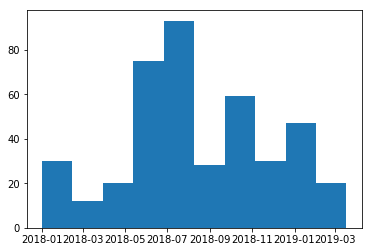

In [110]:
plt.hist(moment_mismatches.report_date)

In [124]:
moment_mismatches.to_csv('/Users/daria/Downloads/moments_apple_only.csv')

In [112]:
moments_either.shape

(4478, 13)

In [114]:
moment_mismatches.shape

(414, 13)

In [116]:
moments_spot_only.shape

(1614, 13)

In [117]:
moment_mismatches[moment_mismatches.report_date>'2019-02-01']

,report_date,isrc,territory,streams_15_week_apple,streams_1_week_apple,score_1_day_apple,score_7_day_apple,score_28_day_apple,streams_15_week_spotify,streams_1_week_spotify,score_1_day_spotify,score_7_day_spotify,score_28_day_spotify
913519,2019-02-22,USUM71813349,CA,65193,6259,20.488,3.157,0.828,"49,557.000","2,567.000",1.658,0.311,0.060
925224,2019-02-22,USUM71813349,US,666144,51997,20.566,2.564,0.762,"263,965.000","13,583.000",0.442,-0.047,0.049
926896,2019-02-22,USUM71813355,US,172207,16474,22.009,3.473,0.904,"118,399.000","5,519.000",-0.083,-0.286,0.044
927583,2019-02-22,USUM71813354,US,161383,13938,18.994,2.673,0.758,"82,491.000","3,852.000",0.345,-0.079,0.026
930839,2019-02-22,USUM71813353,US,184275,16869,21.534,3.091,0.746,"94,204.000","4,259.000",-0.680,-0.206,0.057
931222,2019-02-22,USUM71813350,US,84218,8179,21.865,3.008,0.932,"44,934.000","1,847.000",-0.782,-0.263,0.086
2426777,2019-02-23,USUM71813355,GB,35052,3822,6.098,2.867,0.761,"42,999.000","1,995.000",0.507,0.199,0.087
2432008,2019-02-23,USUM71813350,US,91069,15623,7.675,5.870,1.640,"44,430.000","1,854.000",0.331,-0.043,0.123
2434280,2019-02-23,USUM71813349,US,686220,75353,6.780,4.438,1.177,"262,009.000","13,568.000",-0.172,-0.105,0.060
2434416,2019-02-23,USUM71813353,US,191216,24926,5.705,4.921,1.215,"93,274.000","4,246.000",0.402,-0.173,0.078


In [125]:
apple_owned_pcount = pd.read_csv('/Users/daria/Downloads/apple_owned_playlists.csv')
apple_owned_pcount.head()

,isrc,title,apple_playlists_count
0,SEUM71400823,"Rock Me(Live At Wembley Arena, London/1979)",1
1,USUM70813252,Take a Bow(Tony Moran & Warren Riggs),1
2,GBCEE0700028,Sheer Heart Attack(Live At The Montreal Forum ...,1
3,GBCJN9700001,Flip the Switch,1
4,USMC17504739,Searchin',1


In [126]:
apple_owned_pcount['source']='apple'

In [127]:
apple_owned_pcount = apple_owned_pcount.rename(columns={'apple_playlists_count':'playlists_count'})

In [128]:
apple_owned_pcount.head()

,isrc,title,playlists_count,source
0,SEUM71400823,"Rock Me(Live At Wembley Arena, London/1979)",1,apple
1,USUM70813252,Take a Bow(Tony Moran & Warren Riggs),1,apple
2,GBCEE0700028,Sheer Heart Attack(Live At The Montreal Forum ...,1,apple
3,GBCJN9700001,Flip the Switch,1,apple
4,USMC17504739,Searchin',1,apple


In [129]:
apple_owned_pcount.describe()

,playlists_count
count,"16,122.000"
mean,7.510
std,20.445
min,1.000
25%,1.000
50%,2.000
75%,5.000
max,439.000


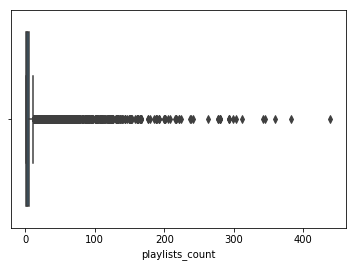

In [130]:
sns.boxplot(apple_owned_pcount.playlists_count)

In [274]:
spotify_metrics_sql = "SELECT * FROM `umg-comm-tech-dev.hundred_artist.spotify_artist_listening_metrics`"

spotify_metrics = gbq.read_gbq(spotify_metrics_sql, project_id='umg-comm-tech-dev', dialect = 'standard')
spotify_metrics.head()

,artist_name,isrc_count,country_name,user_gender,user_age_group,f0_
0,Ice Cube,22,Chad,male,0-17,1.500
1,2Pac,26,Chad,male,0-17,1.077
2,The Cranberries,58,Chad,male,0-17,1.000
3,The Killers,222,Chad,male,0-17,1.000
4,Kanye West,23,Chad,male,0-17,0.739


In [316]:
spotify_metrics = spotify_metrics.sort_values(by=['artist_name','f1_'],
                                             ascending = ['True', 'False'])

In [317]:
spotify_metrics = pd.merge(spotify_metrics,spotify_metrics.groupby(by=['artist_name']).f1_.max().reset_index(),
                           on='artist_name', suffixes=["","_artist_max"])
spotify_metrics['artist_max'] = [1 if x==y else 0 for (x,y) in list(zip(spotify_metrics.f1_, spotify_metrics.f1__artist_max))]

In [318]:
spotify_metrics = pd.merge(spotify_metrics,spotify_metrics.groupby(by=['artist_name']).f1_.mean().reset_index(),
                           on='artist_name', suffixes=["","_artist_mean"])
spotify_metrics['artist_mean_plus'] = [1 if x>y else 0 for (x,y) in list(zip(spotify_metrics.f1_, spotify_metrics.f1__artist_mean))]

In [319]:
spotify_metrics = pd.merge(spotify_metrics,spotify_metrics.groupby(by=['user_country_name','user_gender','user_age_group']).f1_.max().reset_index(),
                           on=['user_country_name','user_gender','user_age_group'], suffixes=["","_demographic_max"])
spotify_metrics['demographic_max'] = [1 if x==y else 0 for (x,y) in list(zip(spotify_metrics.f1_, spotify_metrics.f1__demographic_max))]

In [320]:
spotify_metrics = pd.merge(spotify_metrics,spotify_metrics.groupby(by=['user_country_name','user_gender','user_age_group']).f1_.mean().reset_index(),
                           on=['user_country_name','user_gender','user_age_group'], suffixes=["","_demographic_mean"])
spotify_metrics['demographic_mean_plus'] = [1 if x>y else 0 for (x,y) in list(zip(spotify_metrics.f1_, spotify_metrics.f1__demographic_mean))]

In [321]:
spotify_metrics = pd.merge(spotify_metrics,spotify_metrics.groupby(by=['user_country_name']).f1_.max().reset_index(),
                           on=['user_country_name'], suffixes=["","_country_max"])
spotify_metrics['country_max'] = [1 if x==y else 0 for (x,y) in list(zip(spotify_metrics.f1_, spotify_metrics.f1__country_max))]

In [322]:
spotify_metrics = pd.merge(spotify_metrics,spotify_metrics.groupby(by=['user_country_name']).f1_.mean().reset_index(),
                           on=['user_country_name'], suffixes=["","_country_mean"])
spotify_metrics['country_mean_plus'] = [1 if x>y else 0 for (x,y) in list(zip(spotify_metrics.f1_, spotify_metrics.f1__country_mean))]

In [323]:
spotify_metrics.head()

,artist_name,isrc_count,user_country_name,user_gender,user_age_group,f0_,f1_,f1__artist_max,artist_max,f1__artist_mean,artist_mean_plus,f1__demographic_max,demographic_max,f1__demographic_mean,demographic_mean_plus,f1__country_max,country_max,f1__country_mean,country_mean_plus
0,2Pac,2821,El Salvador,Male,18-24,5.000,5.000,"11,106.507",0,115.152,0,43.811,0,13.631,0,94.052,0,13.471,0
1,50 Cent,114868,El Salvador,Male,18-24,5.154,12.308,"12,046.596",0,106.846,0,43.811,0,13.631,0,94.052,0,13.471,0
2,ABBA,61184,El Salvador,Male,18-24,5.000,9.500,"1,531.394",0,77.219,0,43.811,0,13.631,0,94.052,0,13.471,0
3,Akon,66933,El Salvador,Male,18-24,5.556,8.444,"4,546.587",0,70.926,0,43.811,0,13.631,0,94.052,0,13.471,0
4,Alessia Cara,11865,El Salvador,Male,18-24,5.333,6.000,"5,716.910",0,72.638,0,43.811,0,13.631,0,94.052,0,13.471,0


In [324]:
spotify_metrics[spotify_metrics.demographic_max==1]

,artist_name,isrc_count,user_country_name,user_gender,user_age_group,f0_,f1_,f1__artist_max,artist_max,f1__artist_mean,artist_mean_plus,f1__demographic_max,demographic_max,f1__demographic_mean,demographic_mean_plus,f1__country_max,country_max,f1__country_mean,country_mean_plus
29,Queen,13832532,El Salvador,Male,18-24,13.191,43.811,"16,460.290",0,431.716,0,43.811,1,13.631,1,94.052,0,13.471,1
64,Queen,8304912,El Salvador,Male,35-44,18.312,87.779,"16,460.290",0,431.716,0,87.779,1,14.825,1,94.052,0,13.471,1
117,Queen,12538260,El Salvador,Male,25-34,23.413,94.052,"16,460.290",0,431.716,0,94.052,1,14.366,1,94.052,1,13.471,1
157,Queen,9194724,El Salvador,Female,18-24,11.751,41.378,"16,460.290",0,431.716,0,41.378,1,12.758,1,94.052,0,13.471,1
181,Queen,7037604,El Salvador,Male,45-54,10.954,53.276,"16,460.290",0,431.716,0,53.276,1,13.009,1,94.052,0,13.471,1
190,Amy Winehouse,12789,El Salvador,Female,35-44,5.000,68.000,"3,033.030",0,66.369,1,68.000,1,13.691,1,94.052,0,13.471,1
244,Queen,8736336,El Salvador,Female,25-34,12.133,47.114,"16,460.290",0,431.716,0,47.114,1,11.512,1,94.052,0,13.471,1
268,Queen,4179420,El Salvador,Data Unknown,Data Unknown,10.916,41.755,"16,460.290",0,431.716,0,41.755,1,14.865,1,94.052,0,13.471,1
276,Queen,377496,El Salvador,Male,55-64,5.286,19.286,"16,460.290",0,431.716,0,19.286,1,13.821,1,94.052,0,13.471,1
285,Queen,3154788,El Salvador,Female,45-54,6.761,23.949,"16,460.290",0,431.716,0,23.949,1,11.274,1,94.052,0,13.471,1


In [325]:
spotify_metrics.to_csv('/Users/daria/Downloads/apple_artist_metrics.csv')

In [314]:
apple_metrics_sql = "SELECT * FROM `umg-comm-tech-dev.hundred_artist.apple_artist_listening_metrics2`"

spotify_metrics = gbq.read_gbq(apple_metrics_sql, project_id='umg-comm-tech-dev', dialect = 'standard')

In [315]:
spotify_metrics.head()

,artist_name,isrc_count,user_country_name,user_gender,user_age_group,f0_,f1_
0,George Strait,13242,India,Male,65+,5.000,6.000
1,Toby Keith,4607928,United States,Male,65+,146.237,370.101
2,張學友,6450,Malaysia,Male,65+,5.000,45.000
3,陳奕迅,436240,Hong Kong,Male,65+,14.799,49.033
4,Eric Church,1911,France,Male,65+,5.000,5.000


In [339]:
spotify_metrics = pd.read_csv('/Users/daria/Downloads/spotify_artist_metrics.csv', index_col='Unnamed: 0')
spotify_metrics.head()

,artist_name,isrc_count,country_name,user_gender,user_age_group,f0_,f0__artist_max,artist_max,f0__artist_mean,artist_mean_plus,f0__demographic_max,demographic_max,f0__demographic_mean,demographic_mean_plus,f0__country_max,country_max,f0__country_mean,country_mean_plus
0,2Pac,2,Congo,male,0-17,0.000,316.559,0,1.916,0,1.085,0,0.473,0,7.038,0,0.848,0
1,50 Cent,118,Congo,male,0-17,0.000,453.212,0,3.359,0,1.085,0,0.473,0,7.038,0,0.848,0
2,ABBA,84,Congo,male,0-17,0.250,254.143,0,2.821,0,1.085,0,0.473,0,7.038,0,0.848,0
3,Akon,28,Congo,male,0-17,0.500,428.574,0,2.471,0,1.085,0,0.473,1,7.038,0,0.848,0
4,Bee Gees,51,Congo,male,0-17,0.000,73.383,0,1.929,0,1.085,0,0.473,0,7.038,0,0.848,0


In [340]:
apple_metrics = pd.read_csv('/Users/daria/Downloads/apple_artist_metrics.csv', index_col='Unnamed: 0')
apple_metrics.head()

,artist_name,isrc_count,user_country_name,user_gender,user_age_group,f0_,f1_,f1__artist_max,artist_max,f1__artist_mean,artist_mean_plus,f1__demographic_max,demographic_max,f1__demographic_mean,demographic_mean_plus,f1__country_max,country_max,f1__country_mean,country_mean_plus
0,2Pac,2821,El Salvador,Male,18-24,5.000,5.000,"11,106.507",0,115.152,0,43.811,0,13.631,0,94.052,0,13.471,0
1,50 Cent,114868,El Salvador,Male,18-24,5.154,12.308,"12,046.596",0,106.846,0,43.811,0,13.631,0,94.052,0,13.471,0
2,ABBA,61184,El Salvador,Male,18-24,5.000,9.500,"1,531.394",0,77.219,0,43.811,0,13.631,0,94.052,0,13.471,0
3,Akon,66933,El Salvador,Male,18-24,5.556,8.444,"4,546.587",0,70.926,0,43.811,0,13.631,0,94.052,0,13.471,0
4,Alessia Cara,11865,El Salvador,Male,18-24,5.333,6.000,"5,716.910",0,72.638,0,43.811,0,13.631,0,94.052,0,13.471,0


In [341]:
spotify_metrics['platform'] = 'spotify'
apple_metrics['platform'] = 'apple_music'

In [342]:
cols_rename = {
    'f0_':'streams',
    'f0__artist_max':'streams_artist_max',
    'f0__artist_mean':'streams_artist_mean',
    'f0__demographic_max':'streams_demographic_max',
    'f0__demographic_mean':'streams_demographic_mean',
    'f0__country_max':'streams_country_max',
    'f0__country_mean':'streams_country_mean'
}

spotify_metrics = spotify_metrics.rename(columns=cols_rename)

In [343]:
spotify_metrics.head()

,artist_name,isrc_count,country_name,user_gender,user_age_group,streams,streams_artist_max,artist_max,streams_artist_mean,artist_mean_plus,streams_demographic_max,demographic_max,streams_demographic_mean,demographic_mean_plus,streams_country_max,country_max,streams_country_mean,country_mean_plus,platform
0,2Pac,2,Congo,male,0-17,0.000,316.559,0,1.916,0,1.085,0,0.473,0,7.038,0,0.848,0,spotify
1,50 Cent,118,Congo,male,0-17,0.000,453.212,0,3.359,0,1.085,0,0.473,0,7.038,0,0.848,0,spotify
2,ABBA,84,Congo,male,0-17,0.250,254.143,0,2.821,0,1.085,0,0.473,0,7.038,0,0.848,0,spotify
3,Akon,28,Congo,male,0-17,0.500,428.574,0,2.471,0,1.085,0,0.473,1,7.038,0,0.848,0,spotify
4,Bee Gees,51,Congo,male,0-17,0.000,73.383,0,1.929,0,1.085,0,0.473,0,7.038,0,0.848,0,spotify


In [344]:
cols_rename2 = {
    'user_country_name':'country_name',
    'f1_':'streams',
    'f1__artist_max':'streams_artist_max',
    'f1__artist_mean':'streams_artist_mean',
    'f1__demographic_max':'streams_demographic_max',
    'f1__demographic_mean':'streams_demographic_mean',
    'f1__country_max':'streams_country_max',
    'f1__country_mean':'streams_country_mean'
}

apple_metrics = apple_metrics.rename(columns=cols_rename2)
apple_metrics = apple_metrics.drop(columns=['f0_'])

In [345]:
apple_metrics.head()

,artist_name,isrc_count,country_name,user_gender,user_age_group,streams,streams_artist_max,artist_max,streams_artist_mean,artist_mean_plus,streams_demographic_max,demographic_max,streams_demographic_mean,demographic_mean_plus,streams_country_max,country_max,streams_country_mean,country_mean_plus,platform
0,2Pac,2821,El Salvador,Male,18-24,5.000,"11,106.507",0,115.152,0,43.811,0,13.631,0,94.052,0,13.471,0,apple_music
1,50 Cent,114868,El Salvador,Male,18-24,12.308,"12,046.596",0,106.846,0,43.811,0,13.631,0,94.052,0,13.471,0,apple_music
2,ABBA,61184,El Salvador,Male,18-24,9.500,"1,531.394",0,77.219,0,43.811,0,13.631,0,94.052,0,13.471,0,apple_music
3,Akon,66933,El Salvador,Male,18-24,8.444,"4,546.587",0,70.926,0,43.811,0,13.631,0,94.052,0,13.471,0,apple_music
4,Alessia Cara,11865,El Salvador,Male,18-24,6.000,"5,716.910",0,72.638,0,43.811,0,13.631,0,94.052,0,13.471,0,apple_music


In [346]:
all_metrics = pd.concat([apple_metrics,spotify_metrics], ignore_index=True)

In [354]:
all_metrics[all_metrics.artist_max==1].sort_values(by=['artist_name','platform'], ascending = [True,True])[90:]

,artist_name,isrc_count,country_name,user_gender,user_age_group,streams,streams_artist_max,artist_max,streams_artist_mean,artist_mean_plus,streams_demographic_max,demographic_max,streams_demographic_mean,demographic_mean_plus,streams_country_max,country_max,streams_country_mean,country_mean_plus,platform
52879,Luke Bryan,3560064,United States,Female,18-24,"7,893.596","7,893.596",1,197.607,1,"29,280.383",0,"4,370.380",1,"54,666.231",0,"1,637.980",1,apple_music
512130,Luke Bryan,119891,United States,female,18-22,933.584,933.584,1,2.874,1,"3,875.605",0,488.147,1,"3,875.605",0,92.140,1,spotify
53202,Lynyrd Skynyrd,47917542,United States,Male,25-34,"2,745.258","2,745.258",1,56.180,1,"54,666.231",0,"5,353.380",0,"54,666.231",0,"1,637.980",1,apple_music
512291,Lynyrd Skynyrd,1159195,United States,male,18-22,319.986,319.986,1,4.805,1,"2,467.070",0,441.568,0,"3,875.605",0,92.140,1,spotify
52881,Mariah Carey,12468956,United States,Female,18-24,"4,625.684","4,625.684",1,64.300,1,"29,280.383",0,"4,370.380",1,"54,666.231",0,"1,637.980",1,apple_music
512132,Mariah Carey,301749,United States,female,18-22,316.388,316.388,1,1.841,1,"3,875.605",0,488.147,0,"3,875.605",0,92.140,1,spotify
53204,Marvin Gaye,114034284,United States,Male,25-34,"1,961.306","1,961.306",1,49.424,1,"54,666.231",0,"5,353.380",0,"54,666.231",0,"1,637.980",1,apple_music
511573,Marvin Gaye,2303784,United States,female,45-59,52.760,52.760,1,1.710,1,"1,316.747",0,145.210,0,"3,875.605",0,92.140,0,spotify
52963,Mary J. Blige,13603265,United States,Female,25-34,"5,719.001","5,719.001",1,68.165,1,"26,288.187",0,"4,123.163",1,"54,666.231",0,"1,637.980",1,apple_music
511734,Mary J. Blige,255321,United States,female,35-44,159.624,159.624,1,1.761,1,"1,722.359",0,199.058,0,"3,875.605",0,92.140,1,spotify


In [373]:
all_metrics[(all_metrics.platform=='apple_music')&(all_metrics.country_name=='Germany')&(all_metrics.country_mean_plus==1)].sort_values(by=['country_name','streams','platform'], 
                                                            ascending=[True,False,True])

,artist_name,isrc_count,country_name,user_gender,user_age_group,streams,streams_artist_max,artist_max,streams_artist_mean,artist_mean_plus,streams_demographic_max,demographic_max,streams_demographic_mean,demographic_mean_plus,streams_country_max,country_max,streams_country_mean,country_mean_plus,platform
46203,Eminem,17869030,Germany,Male,18-24,"1,896.250","40,724.924",0,321.641,1,"1,896.250",1,178.220,1,"1,896.250",1,110.051,1,apple_music
46284,Eminem,17996590,Germany,Male,25-34,"1,751.712","40,724.924",0,321.641,1,"1,751.712",1,229.186,1,"1,896.250",0,110.051,1,apple_music
45837,Queen,39367440,Germany,Male,45-54,"1,449.725","16,460.290",0,431.716,1,"1,449.725",1,167.953,1,"1,896.250",0,110.051,1,apple_music
46043,Eminem,16274530,Germany,Data Unknown,Data Unknown,"1,415.308","40,724.924",0,321.641,1,"1,415.308",1,174.217,1,"1,896.250",0,110.051,1,apple_music
46319,Queen,43897392,Germany,Male,25-34,"1,241.838","16,460.290",0,431.716,1,"1,751.712",0,229.186,1,"1,896.250",0,110.051,1,apple_music
46078,Queen,36428364,Germany,Data Unknown,Data Unknown,"1,151.741","16,460.290",0,431.716,1,"1,415.308",0,174.217,1,"1,896.250",0,110.051,1,apple_music
46157,Queen,40419036,Germany,Male,35-44,"1,113.161","16,460.290",0,431.716,1,"1,113.161",1,157.934,1,"1,896.250",0,110.051,1,apple_music
45919,Rihanna,32120548,Germany,Female,18-24,"1,064.954","27,181.508",0,184.106,1,"1,064.954",1,165.600,1,"1,896.250",0,110.051,1,apple_music
45916,Queen,39448332,Germany,Female,18-24,976.651,"16,460.290",0,431.716,1,"1,064.954",0,165.600,1,"1,896.250",0,110.051,1,apple_music
46238,Queen,40823496,Germany,Male,18-24,930.316,"16,460.290",0,431.716,1,"1,896.250",0,178.220,1,"1,896.250",0,110.051,1,apple_music


In [372]:
all_metrics[(all_metrics.platform=='spotify')&(all_metrics.artist_mean_plus==1)].sort_values(by=['artist_name','streams','platform'], 
                                                            ascending=[True,False,True])

,artist_name,isrc_count,country_name,user_gender,user_age_group,streams,streams_artist_max,artist_max,streams_artist_mean,artist_mean_plus,streams_demographic_max,demographic_max,streams_demographic_mean,demographic_mean_plus,streams_country_max,country_max,streams_country_mean,country_mean_plus,platform
512404,2Pac,164841,United States,male,28-34,316.559,316.559,1,1.916,1,"2,545.009",0,339.297,0,"3,875.605",0,92.140,1,spotify
512324,2Pac,163925,United States,male,23-27,300.457,316.559,0,1.916,1,"2,577.938",0,400.729,0,"3,875.605",0,92.140,1,spotify
512244,2Pac,160828,United States,male,18-22,297.947,316.559,0,1.916,1,"2,467.070",0,441.568,0,"3,875.605",0,92.140,1,spotify
512164,2Pac,156565,United States,male,35-44,253.353,316.559,0,1.916,1,"2,071.901",0,227.288,1,"3,875.605",0,92.140,1,spotify
512084,2Pac,147632,United States,female,18-22,125.526,316.559,0,1.916,1,"3,875.605",0,488.147,0,"3,875.605",0,92.140,1,spotify
479740,2Pac,140656,United Kingdom,male,18-22,124.412,316.559,0,1.916,1,484.798,0,108.853,1,578.161,0,22.592,1,spotify
479660,2Pac,142319,United Kingdom,male,23-27,106.333,316.559,0,1.916,1,375.603,0,89.769,1,578.161,0,22.592,1,spotify
512004,2Pac,147316,United States,female,23-27,104.322,316.559,0,1.916,1,"2,089.268",0,345.036,0,"3,875.605",0,92.140,1,spotify
511924,2Pac,141571,United States,male,0-17,104.287,316.559,0,1.916,1,649.472,0,144.628,0,"3,875.605",0,92.140,1,spotify
511844,2Pac,147075,United States,female,28-34,103.864,316.559,0,1.916,1,"1,991.990",0,265.284,0,"3,875.605",0,92.140,1,spotify


In [134]:
spotify_artist_concentration_sql = """
SELECT * FROM `umg-comm-tech-dev.hundred_artist.spotify_artist_isrc_concentration`
"""

spotify_conc = gbq.read_gbq(spotify_artist_concentration_sql, project_id='umg-comm-tech-dev', dialect = 'standard')
spotify_conc.head()

,track_artist,isrc,isrc_global_streams,isrc_skips,isrc_saves
0,U2,GBUM70819377,299544376,7722224,1822992
1,U2,GBUM70713136,312666669,8998983,2755102
2,U2,GBUM71804389,26176024,573493,39018
3,U2,GBAAN9700020,30867194,770836,273358
4,U2,GBAAN8790005,55,3,86


In [228]:
spotify_conc = pd.merge(spotify_conc, streams, on='isrc')
spotify_conc.head()

,track_artist,isrc,isrc_global_streams,isrc_skips,isrc_saves,f0_
0,U2,GBUM70819377,299544376,7722224,1822992,150513
1,U2,GBUM70713136,312666669,8998983,2755102,168513
2,U2,GBUM71804389,26176024,573493,39018,96927
3,U2,GBAAN9700020,30867194,770836,273358,66792
4,U2,GBAAN8790005,55,3,86,19


In [229]:
by_artist = spotify_conc.groupby(by='track_artist')

In [230]:
spotify_conc_prop = pd.merge(spotify_conc,by_artist.f0_.sum().reset_index(), on = 'track_artist',
                            suffixes = ["","_artist"])

In [231]:
spotify_conc_prop = pd.merge(spotify_conc_prop,by_artist.isrc_skips.sum().reset_index(), on = 'track_artist',
                            suffixes = ["","_artist"])
spotify_conc_prop = pd.merge(spotify_conc_prop,by_artist.isrc_saves.sum().reset_index(), on = 'track_artist',
                            suffixes = ["","_artist"])

In [234]:
spotify_conc_prop['streams_prop'] = spotify_conc_prop.f0_/spotify_conc_prop.f0__artist
spotify_conc_prop['skips_prop'] = spotify_conc_prop.isrc_skips/spotify_conc_prop.f0__artist
spotify_conc_prop['saves_prop'] = spotify_conc_prop.isrc_saves/spotify_conc_prop.f0__artist


In [235]:
spotify_conc_prop.describe()

,isrc_global_streams,isrc_skips,isrc_saves,f0_,f0__artist,isrc_skips_artist,isrc_saves_artist,streams_prop,skips_prop,saves_prop
count,"23,543.000","23,543.000","23,543.000","23,543.000","23,543.000","23,543.000","23,543.000","23,543.000","23,543.000","23,543.000"
mean,"17,651,688,499.058","211,264,604.210","14,561,782.358","937,769.990","348,254,836.763","70,836,566,112.835","5,476,136,135.307",0.003,0.739,0.049
std,"245,127,880,378.361","2,177,225,709.037","152,220,578.986","4,896,860.063","457,319,884.939","116,310,597,500.395","11,033,657,680.791",0.018,8.864,0.552
min,1.000,0.000,0.000,1.000,"2,152,714.000","221,850.000","66,200.000",0.000,0.000,0.000
25%,"344,461.500","42,072.500","15,652.000","5,384.500","138,903,665.000","11,207,435,058.000","1,300,445,245.000",0.000,0.000,0.000
50%,"7,028,252.000","554,332.000","140,757.000","31,420.000","226,409,869.000","34,449,642,396.000","2,889,998,411.000",0.000,0.002,0.001
75%,"207,306,645.000","8,281,884.000","1,394,072.000","230,854.000","312,271,546.000","75,879,462,673.000","5,700,767,408.000",0.001,0.036,0.006
max,"17,675,481,779,564.000","119,492,480,184.000","9,894,664,276.000","266,690,096.000","2,422,431,090.000","642,523,352,872.000","65,535,519,867.000",1.000,786.576,51.225


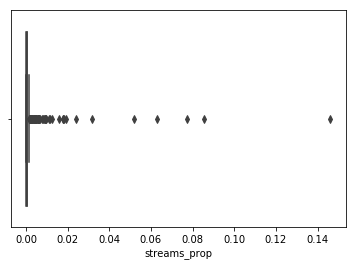

In [236]:
sns.boxplot(spotify_conc_prop[spotify_conc_prop.track_artist=='U2'].streams_prop)

In [237]:
spotify_conc_prop_sorted = spotify_conc_prop.sort_values(by=['track_artist','streams_prop','skips_prop','saves_prop'],
                                                        ascending=[True,False,True,False])

In [238]:
gbq.to_gbq(spotify_conc_prop, destination_table='hundred_artist.spotify_artist_isrc_concentration_withperc', 
           if_exists='replace', project_id = 'umg-comm-tech-dev')

1it [00:00,  1.90it/s]


In [154]:
get_spotify_artist_conc = """SELECT * FROM `umg-comm-tech-dev.hundred_artist.spotify_artists_conc_withplaylists`"""

In [240]:
conc_data = gbq.read_gbq(get_spotify_artist_conc, project_id='umg-comm-tech-dev', dialect='standard')
conc_data.head()

,track_artist,isrc,isrc_global_streams,artist_global_streams,streams_prop,skips_prop,saves_prop,in_spotify_playlists,in_apple_playlists
0,U2,GBUM70805865,22068,289064686,0.000,0.001,0.000,0,0
1,U2,USSE91334854,1604,289064686,0.000,0.000,0.000,0,0
2,U2,GBAAN0000231,1205511,289064686,0.004,0.085,0.011,0,0
3,U2,GBUM70805866,18995,289064686,0.000,0.001,0.000,0,0
4,U2,GBAAN0201241,2438,289064686,0.000,0.000,0.000,0,0


In [241]:
conc_data = conc_data.sort_values(by=['track_artist','streams_prop','skips_prop','saves_prop'],
                                                        ascending=[True,False,True,False])

In [242]:
conc_data.head(10)

,track_artist,isrc,isrc_global_streams,artist_global_streams,streams_prop,skips_prop,saves_prop,in_spotify_playlists,in_apple_playlists
13275,2Pac,USUG10702628,29957535,222525921,0.135,17.703,0.937,1,1
13273,2Pac,USUG10801475,25143608,222525921,0.113,5.468,0.218,1,1
13250,2Pac,USIR10110269,13774170,222525921,0.062,5.101,0.252,1,1
13160,2Pac,USIR19300816,11937790,222525921,0.054,2.524,0.112,1,1
13099,2Pac,USIR19500009,11364731,222525921,0.051,4.548,0.332,1,1
13197,2Pac,USIR10401032,9064760,222525921,0.041,14.688,0.622,1,1
13265,2Pac,USDJ20300663,8824545,222525921,0.040,2.071,0.145,1,1
13130,2Pac,USIR19300813,7346120,222525921,0.033,1.419,0.108,1,1
13294,2Pac,USUG10702630,7214473,222525921,0.032,2.787,0.177,0,1
13105,2Pac,USIR19500004,4120156,222525921,0.019,1.864,0.184,0,1


In [243]:
conc_data['streams_prop_spotify_playlists'] = conc_data.in_spotify_playlists*conc_data.streams_prop
conc_data['streams_prop_apple_playlists'] = conc_data.in_apple_playlists*conc_data.streams_prop

In [244]:
conc_by_artist = conc_data.groupby(by='track_artist')

In [245]:
conc_agg = pd.DataFrame(conc_by_artist.in_spotify_playlists.sum())

In [246]:
conc_agg = pd.merge(conc_agg, pd.DataFrame(conc_by_artist.in_apple_playlists.sum()), left_index=True, 
                    right_index=True)

conc_agg = pd.merge(conc_agg, pd.DataFrame(conc_by_artist.in_spotify_playlists.count()), left_index=True, 
                    right_index=True)
conc_agg = pd.merge(conc_agg, pd.DataFrame(conc_by_artist.in_apple_playlists.count()), left_index=True, 
                    right_index=True)

conc_agg = pd.merge(conc_agg, pd.DataFrame(conc_by_artist.streams_prop_spotify_playlists.sum()), left_index=True, 
                    right_index=True)
conc_agg = pd.merge(conc_agg, pd.DataFrame(conc_by_artist.streams_prop_apple_playlists.sum()), left_index=True, 
                    right_index=True)

In [247]:
conc_agg.head()

,in_spotify_playlists_x,in_apple_playlists_x,in_spotify_playlists_y,in_apple_playlists_y,streams_prop_spotify_playlists,streams_prop_apple_playlists
track_artist,,,,,,
2Pac,14,206,326,326,0.570,0.967
3 Doors Down,7,80,147,147,0.681,0.969
50 Cent,22,173,273,273,0.746,0.996
ABBA,30,121,187,187,0.811,0.977
Akon,14,73,131,131,0.850,0.992


In [248]:
conc_agg.describe()

,in_spotify_playlists_x,in_apple_playlists_x,in_spotify_playlists_y,in_apple_playlists_y,streams_prop_spotify_playlists,streams_prop_apple_playlists
count,80.000,80.000,80.000,80.000,80.000,80.000
mean,29.512,133.875,294.288,294.288,0.750,0.967
std,28.612,88.301,301.229,301.229,0.133,0.041
min,1.000,1.000,1.000,1.000,0.366,0.791
25%,13.750,87.500,131.750,131.750,0.680,0.946
50%,21.500,110.500,195.500,195.500,0.759,0.980
75%,36.000,166.500,352.750,352.750,0.849,0.994
max,217.000,482.000,"1,945.000","1,945.000",1.000,1.000


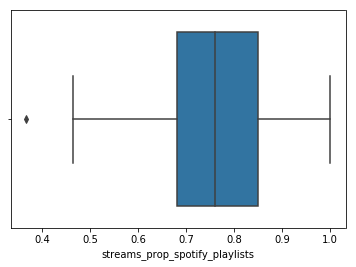

In [249]:
sns.boxplot(conc_agg.streams_prop_spotify_playlists)

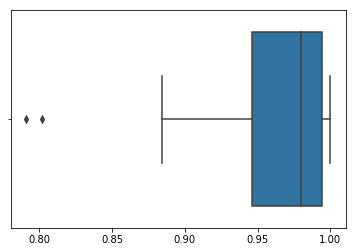

In [250]:
sns.boxplot(data=conc_agg, x = ['streams_prop_apple_playlists'])

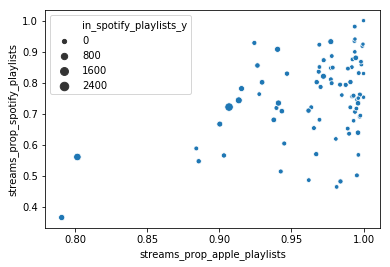

In [251]:
sns.scatterplot(x = conc_agg.streams_prop_apple_playlists, y=conc_agg.streams_prop_spotify_playlists,
               size = conc_agg.in_spotify_playlists_y)

In [252]:
conc_agg.sort_values(by='streams_prop_spotify_playlists')

,in_spotify_playlists_x,in_apple_playlists_x,in_spotify_playlists_y,in_apple_playlists_y,streams_prop_spotify_playlists,streams_prop_apple_playlists
track_artist,,,,,,
Jacky Cheung,16,112,748,748,0.366,0.791
Breaking Benjamin,12,91,111,111,0.464,0.981
Rick Ross,12,178,310,310,0.482,0.984
Rise Against,17,102,134,134,0.486,0.962
Kid Cudi,11,160,188,188,0.502,0.995
Eric Church,16,91,238,238,0.514,0.943
Ice Cube,13,166,352,352,0.547,0.886
Frank Sinatra,41,248,1378,1378,0.561,0.802
Eason Chan,18,101,346,346,0.566,0.903


In [180]:
target_artists = ['2Pac','Metallica','Frank Sinatra', 'The Beatles']

In [210]:
pd.DataFrame(conc_data[conc_data.track_artist.isin(target_artists)].isrc.unique()).to_csv('/Users/daria/Downloads/isrc.csv')

In [253]:
conc_data[conc_data.track_artist.isin(target_artists)].groupby(by=['track_artist','in_spotify_playlists']).isrc_global_streams.sum()

track_artist   in_spotify_playlists
2Pac           0                        95689352
               1                       126836569
Frank Sinatra  0                       115918175
               1                       148019745
Metallica      0                       104003228
               1                       208183186
The Beatles    0                       222725946
               1                       616259034
Name: isrc_global_streams, dtype: int64

In [254]:
95689352/5

19137870.4

In [256]:
95689352/(126836569+95689352)

0.4300144071755128

In [225]:
streams = gbq.read_gbq("""SELECT * FROM `umg-comm-tech-dev.hundred_artist.spotify_streams`""", 
                       project_id = 'umg-comm-tech-dev', dialect='standard')
streams.head()

,isrc,f0_
0,USDJ20201208,0
1,USUM70618377,0
2,USDJ20110674,0
3,USCA20803121,0
4,QMJMT1300048,0


In [227]:
conc_data_new_streams.head()

,track_artist,isrc,isrc_global_streams,streams_prop,skips_prop,saves_prop,in_spotify_playlists,in_apple_playlists,streams_prop_spotify_playlists,streams_prop_apple_playlists,f0_
0,2Pac,USIR10401032,194302893424,0.235,0.004,0.000,1,1,0.235,0.235,9064760
1,2Pac,USUG10702628,183683212425,0.223,0.005,0.000,1,1,0.223,0.223,29957535
2,2Pac,USUG10801475,64836462226,0.079,0.001,0.000,1,1,0.079,0.079,25143608
3,2Pac,USIR19500009,59714211476,0.072,0.001,0.000,1,1,0.072,0.072,11364731
4,2Pac,USIR10110269,57671490516,0.070,0.001,0.000,1,1,0.070,0.070,13774170


In [214]:
target_data.groupby(by=['track_artist','in_spotify_playlists']).f0_.sum()

track_artist   in_spotify_playlists
2Pac           0                        95689352
               1                       126836569
Frank Sinatra  0                       115918175
               1                       148019745
Metallica      0                       104003228
               1                       208183186
The Beatles    0                       222725946
               1                       616259034
Name: f0_, dtype: int64

In [217]:
115918175/126836569

0.913917617875646

In [220]:
222725946/5

44545189.2

In [257]:
streams_apple = gbq.read_gbq('select * from `umg-comm-tech-dev.hundred_artist.apple_streams`',
                            project_id = 'umg-comm-tech-dev', dialect='standard')
streams_apple.head()

,isrc,f0_
0,USYAH1100351,2229787
1,USUM71311304,182481
2,GBUM71106610,26959
3,USMC17347089,1794809
4,GBUM70911786,39484


In [259]:
conc_data_new_streams = pd.merge(conc_data, streams_apple, on='isrc')

In [260]:
conc_data_new_streams.head()

,track_artist,isrc,isrc_global_streams,artist_global_streams,streams_prop,skips_prop,saves_prop,in_spotify_playlists,in_apple_playlists,streams_prop_spotify_playlists,streams_prop_apple_playlists,f0_
0,2Pac,USUG10702628,29957535,222525921,0.135,17.703,0.937,1,1,0.135,0.135,11179090
1,2Pac,USUG10801475,25143608,222525921,0.113,5.468,0.218,1,1,0.113,0.113,8669616
2,2Pac,USIR10110269,13774170,222525921,0.062,5.101,0.252,1,1,0.062,0.062,10622941
3,2Pac,USIR19300816,11937790,222525921,0.054,2.524,0.112,1,1,0.054,0.054,1190334
4,2Pac,USIR19500009,11364731,222525921,0.051,4.548,0.332,1,1,0.051,0.051,7870287


In [261]:
conc_data_new_streams[conc_data_new_streams.track_artist.isin(target_artists)].groupby(by=['track_artist','in_spotify_playlists']).f0_.sum()

track_artist   in_spotify_playlists
2Pac           0                        73158872
               1                        55210743
Frank Sinatra  0                        39694346
               1                        25626110
Metallica      0                        17562752
               1                        23451100
The Beatles    0                        68319592
               1                       154042783
Name: f0_, dtype: int64

In [265]:
68319592/5

13663918.4

In [266]:
conc_data_new_streams.groupby(by=['in_spotify_playlists']).f0_.sum()

in_spotify_playlists
0    2552843830
1    5297651559
Name: f0_, dtype: int64

In [271]:
68319592/(68319592+154042783)

0.30724438880453586